# Classification 0117

In [236]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

In [237]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [238]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")

In [239]:
print(train)

       danceability  energy  key  loudness  speechiness  acousticness  \
0            1.0000     4.0   10       4.0          4.0           4.0   
1            4.0000     4.0   10       0.0          4.0           0.0   
2            1.0000     0.0    8       0.0          0.0           4.0   
3            1.0000     4.0    2       4.0          4.0           4.0   
4            0.0000     4.0    5       4.0          4.0           4.0   
...             ...     ...  ...       ...          ...           ...   
25378        0.8814     0.0    6       4.0          4.0           4.0   
25379        4.0000     4.0    0       4.0          4.0           4.0   
25380        1.0000     4.0    8       4.0          0.0           0.0   
25381        4.0000     0.0    0       4.0          4.0           4.0   
25382        0.8963     4.0    9       4.0          4.0           4.0   

       instrumentalness  liveness  valence  tempo  duration            genre  
0                   0.0       4.0      4.0  

# EDA

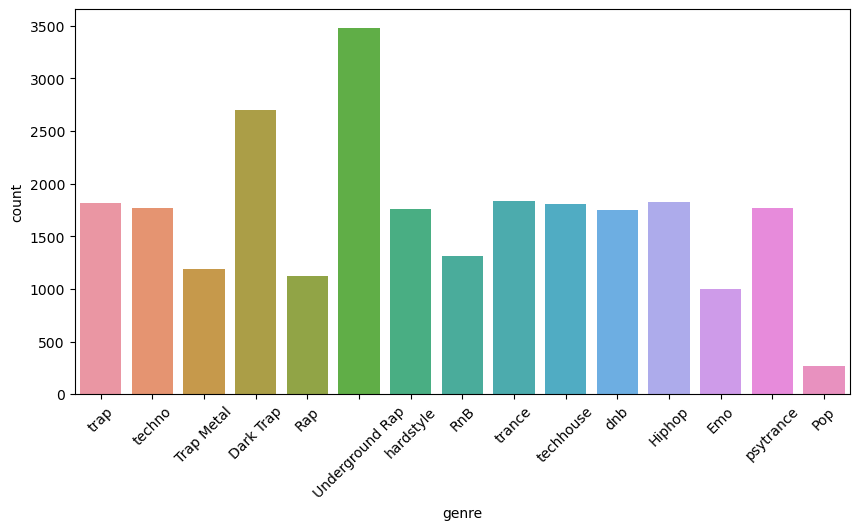

In [240]:
fig, ax = plt.subplots(figsize=(10,5), dpi = 100)

sns.countplot(x = df_train['genre'])
plt.xticks(rotation = 45)
plt.show()

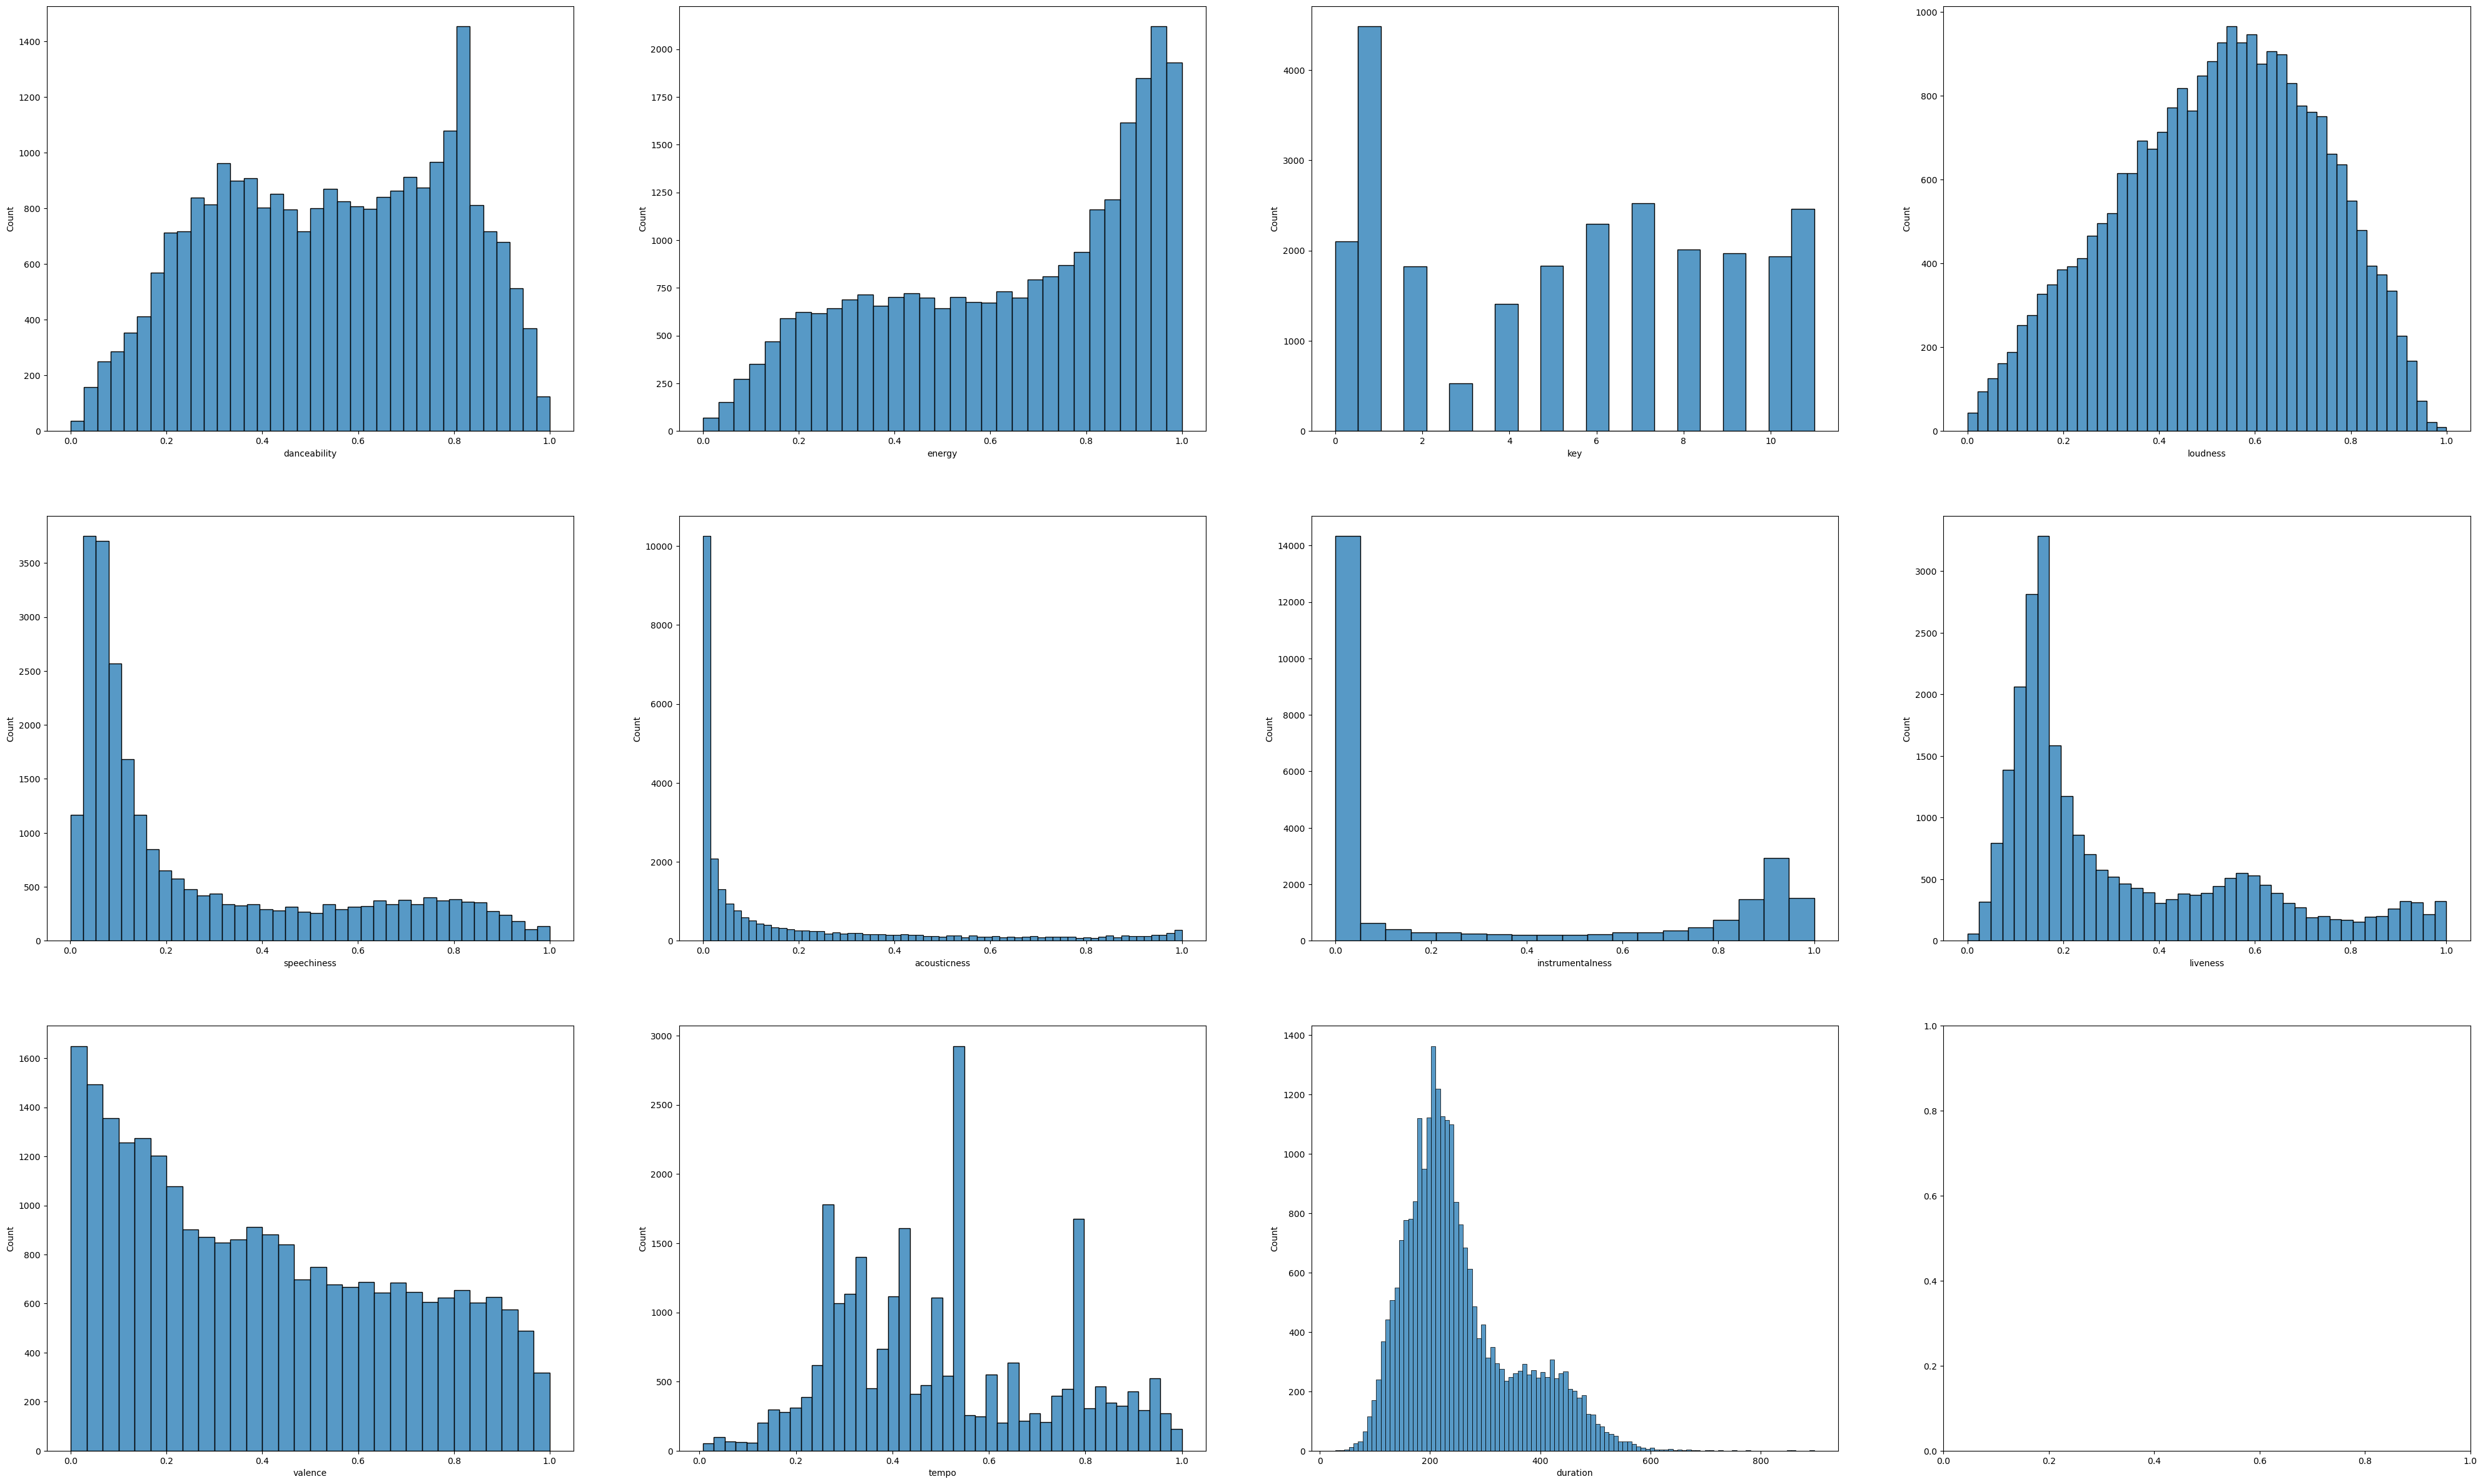

In [241]:
fig, axs = plt.subplots(figsize = (50,30), ncols =4 , nrows = 3, dpi = 100)
lm_features = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration']

for i,j in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.histplot(x = df_train[j] , ax = axs[row][col])

plt.show()

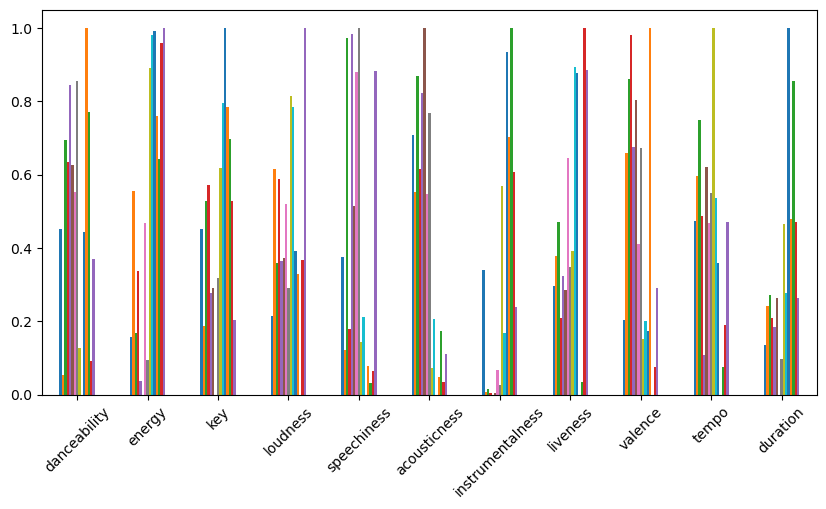

In [242]:
from sklearn.preprocessing import MinMaxScaler

fig, ax = plt.subplots(figsize = (10,5), dpi = 100)

scaler = MinMaxScaler()
temp = df_train.groupby(by='genre').mean()
temp[df_train.groupby(by='genre').mean().columns] = scaler.fit_transform(df_train.groupby(by='genre').mean())

temp.T.plot(kind='bar', legend=False , ax = ax)
plt.xticks(rotation = 45)
plt.show()

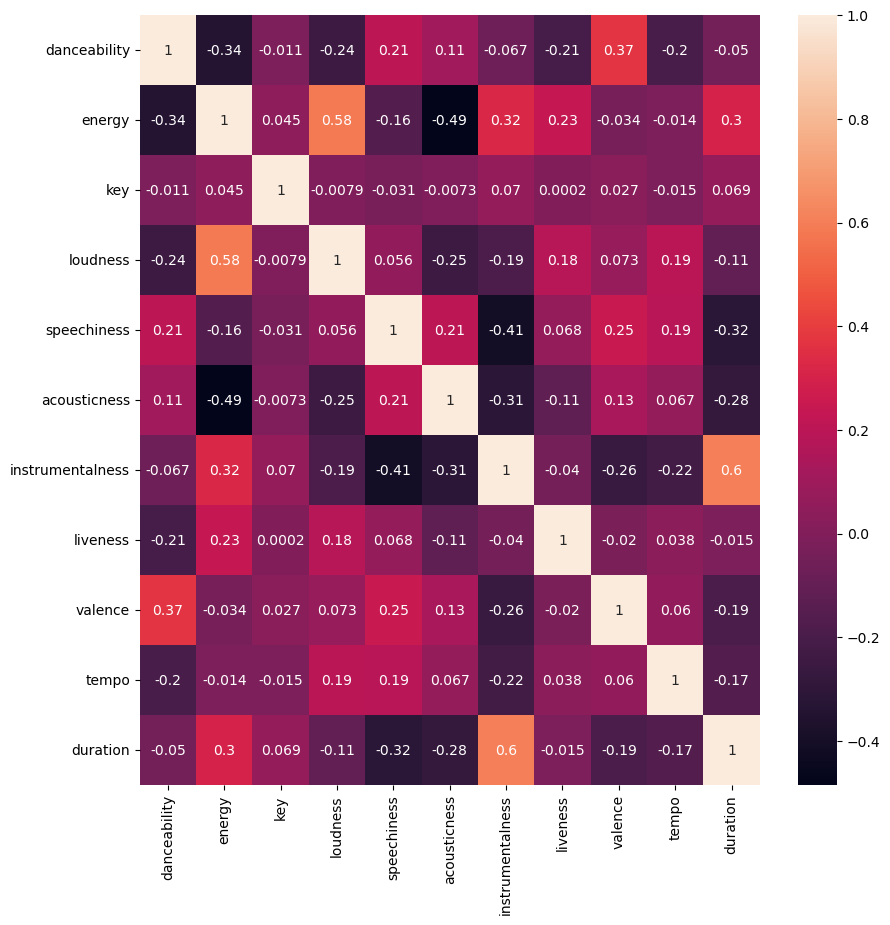

In [243]:
plt.figure(figsize = (10,10))

df = df_train.corr()
sns.heatmap(df, annot =True)
plt.show()

In [244]:
# X는 독립변수이므로 종속변수를 제거합니다. 또한 target 이외의 문자열 데이터를 제거합니다.
train = df_train.drop(["ID"], axis = 1)
# y는 종속변수로 값을 설정합니다.
y = df_train['genre']

# train에서와 마찬가지로 문자열이 포함된 특성은 제거합니다.
test = df_test.drop(["ID"], axis = 1)

In [245]:
X.columns

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration', 'mean', 'std', 'Median', 'DanceCut'],
      dtype='object')

In [246]:
'''
# 평균, 표준편차, 중앙값 New Feature
train['mean'] = df_train.mean(axis = 1)
train['std'] = df_train.std(axis = 1)
train['Median'] = df_train.median(axis = 1)

test['mean'] = df_test.mean(axis = 1)
test['std'] = df_test.std(axis = 1)
test['Median'] = df_test.median(axis = 1)
'''

"\n# 평균, 표준편차, 중앙값 New Feature\ntrain['mean'] = df_train.mean(axis = 1)\ntrain['std'] = df_train.std(axis = 1)\ntrain['Median'] = df_train.median(axis = 1)\n\ntest['mean'] = df_test.mean(axis = 1)\ntest['std'] = df_test.std(axis = 1)\ntest['Median'] = df_test.median(axis = 1)\n"

In [247]:
combine = [train,test]

In [248]:
train['DanceCut'] = pd.cut(train['danceability'], 5)
train[['DanceCut', 'genre']].groupby(['DanceCut'], as_index=False).mean().sort_values(by='DanceCut', ascending=True)

,DanceCut
0,"(-0.001, 0.2]"
1,"(0.2, 0.4]"
2,"(0.4, 0.6]"
3,"(0.6, 0.8]"
4,"(0.8, 1.0]"


In [249]:
for dataset in combine:    
    dataset.loc[dataset['danceability'] <= 0.2, 'danceability'] = 0
    dataset.loc[(dataset['danceability'] > 0.2) & (dataset['danceability'] <= 0.4), 'danceability'] = 1
    dataset.loc[(dataset['danceability'] > 0.4) & (dataset['danceability'] <= 0.6), 'danceability'] = 2
    dataset.loc[(dataset['danceability'] > 0.6) & (dataset['danceability'] <= 0.8), 'danceability'] = 3
    dataset.loc[dataset['danceability'] > 1.0, 'danceability'] = 4
train = train.drop(['DanceCut'], axis=1)
combine = [train,test]

In [250]:
train['energyCut'] = pd.qcut(train['energy'], 5)
train[['energyCut', 'genre']].groupby(['energyCut'], as_index=False).mean().sort_values(by='energyCut', ascending=True)

,energyCut
0,"(-0.001, 0.35]"
1,"(0.35, 0.588]"
2,"(0.588, 0.797]"
3,"(0.797, 0.919]"
4,"(0.919, 1.0]"


In [251]:
for dataset in combine:    
    dataset.loc[dataset['energy'] <= 0.35, 'energy'] = 0
    dataset.loc[(dataset['energy'] > 0.35) & (dataset['energy'] <= 0.588), 'energy'] = 1
    dataset.loc[(dataset['energy'] > 0.588) & (dataset['energy'] <= 0.797), 'energy'] = 2
    dataset.loc[(dataset['energy'] > 0.797) & (dataset['energy'] <= 0.919), 'energy'] = 3
    dataset.loc[dataset['energy'] > 0.919, 'energy'] = 4
train = train.drop(['energyCut'], axis=1)
combine = [train,test]

In [252]:
train['LoudCut'] = pd.qcut(train['loudness'], 5)
train[['LoudCut', 'genre']].groupby(['LoudCut'], as_index=False).mean().sort_values(by='LoudCut', ascending=True)

,LoudCut
0,"(-0.001, 0.332]"
1,"(0.332, 0.479]"
2,"(0.479, 0.594]"
3,"(0.594, 0.717]"
4,"(0.717, 1.0]"


In [253]:
for dataset in combine:    
    dataset.loc[dataset['loudness'] <= 0.332, 'loudness'] = 0
    dataset.loc[(dataset['loudness'] > 0.332) & (dataset['loudness'] <= 0.479), 'loudness'] = 1
    dataset.loc[(dataset['loudness'] > 0.479) & (dataset['loudness'] <= 0.594), 'loudness'] = 2
    dataset.loc[(dataset['loudness'] > 0.594) & (dataset['loudness'] <= 0.717), 'loudness'] = 3
    dataset.loc[dataset['loudness'] > 0.717, 'loudness'] = 4
train = train.drop(['LoudCut'], axis=1)
combine = [train,test]

In [254]:
train['speechCut'] = pd.qcut(train['speechiness'], 5)
train[['speechCut', 'genre']].groupby(['speechCut'], as_index=False).mean().sort_values(by='speechCut', ascending=True)

,speechCut
0,"(0.00010000000000000005, 0.0547]"
1,"(0.0547, 0.0946]"
2,"(0.0946, 0.199]"
3,"(0.199, 0.564]"
4,"(0.564, 1.0]"


In [255]:
for dataset in combine:    
    dataset.loc[dataset['speechiness'] <= 0.0547, 'speechiness'] = 0
    dataset.loc[(dataset['speechiness'] > 0.0547) & (dataset['speechiness'] <= 0.0946), 'speechiness'] = 1
    dataset.loc[(dataset['speechiness'] > 0.0946) & (dataset['speechiness'] <= 0.199), 'speechiness'] = 2
    dataset.loc[(dataset['speechiness'] > 0.199) & (dataset['speechiness'] <= 0.564), 'speechiness'] = 3
    dataset.loc[dataset['speechiness'] > 0.564, 'speechiness'] = 4
train = train.drop(['speechCut'], axis=1)
combine = [train,test]

In [256]:
test.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,0.8861,4.0,2,4.0,4.0,0.1451,0.0000,0.5087,0.8863,0.9648,279
1,0.8495,4.0,1,4.0,4.0,0.6234,0.0004,0.1347,0.4062,0.9051,151
2,1.0000,4.0,3,4.0,4.0,0.5718,0.0000,0.1250,0.6357,0.3234,196
3,4.0000,4.0,1,4.0,4.0,0.0020,0.6016,0.8799,0.8790,0.2946,207
4,4.0000,4.0,6,4.0,0.0,0.0283,0.0001,0.1580,0.9288,0.3642,196


In [257]:
train['acoustCut'] = pd.qcut(train['acousticness'], 5)
train[['acoustCut', 'genre']].groupby(['acoustCut'], as_index=False).mean().sort_values(by='acoustCut', ascending=True)

,acoustCut
0,"(-0.001, 0.0021]"
1,"(0.0021, 0.0153]"
2,"(0.0153, 0.0764]"
3,"(0.0764, 0.338]"
4,"(0.338, 1.0]"


In [258]:
for dataset in combine:    
    dataset.loc[dataset['acousticness'] <= 0.0021, 'acousticness'] = 0
    dataset.loc[(dataset['acousticness'] > 0.0021) & (dataset['acousticness'] <= 0.0153), 'acousticness'] = 1
    dataset.loc[(dataset['acousticness'] > 0.0153) & (dataset['acousticness'] <= 0.0764), 'acousticness'] = 2
    dataset.loc[(dataset['acousticness'] > 0.0764) & (dataset['acousticness'] <= 0.338), 'acousticness'] = 3
    dataset.loc[dataset['acousticness'] > 0.338, 'acousticness'] = 4
train = train.drop(['acoustCut'], axis=1)
combine = [train,test]

In [259]:
train['instruCut'] = pd.cut(train['instrumentalness'], 5)
train[['instruCut', 'genre']].groupby(['instruCut'], as_index=False).mean().sort_values(by='instruCut', ascending=True)

,instruCut
0,"(-0.001, 0.2]"
1,"(0.2, 0.4]"
2,"(0.4, 0.6]"
3,"(0.6, 0.8]"
4,"(0.8, 1.0]"


In [260]:
for dataset in combine:    
    dataset.loc[dataset['instrumentalness'] <= 0.2, 'instrumentalness'] = 0
    dataset.loc[(dataset['instrumentalness'] > 0.2) & (dataset['instrumentalness'] <= 0.4), 'instrumentalness'] = 1
    dataset.loc[(dataset['instrumentalness'] > 0.4) & (dataset['instrumentalness'] <= 0.6), 'instrumentalness'] = 2
    dataset.loc[(dataset['instrumentalness'] > 0.6) & (dataset['instrumentalness'] <= 0.8), 'instrumentalness'] = 3
    dataset.loc[dataset['instrumentalness'] > 0.8, 'instrumentalness'] = 4
train = train.drop(['instruCut'], axis=1)
combine = [train,test]

In [261]:
train['liveCut'] = pd.qcut(train['liveness'], 5)
train[['liveCut', 'genre']].groupby(['liveCut'], as_index=False).mean().sort_values(by='liveCut', ascending=True)

,liveCut
0,"(-0.001, 0.126]"
1,"(0.126, 0.165]"
2,"(0.165, 0.276]"
3,"(0.276, 0.566]"
4,"(0.566, 1.0]"


In [262]:
for dataset in combine:    
    dataset.loc[dataset['liveness'] <= 0.2, 'liveness'] = 0
    dataset.loc[(dataset['liveness'] > 0.2) & (dataset['liveness'] <= 0.4), 'liveness'] = 1
    dataset.loc[(dataset['liveness'] > 0.4) & (dataset['liveness'] <= 0.6), 'liveness'] = 2
    dataset.loc[(dataset['liveness'] > 0.6) & (dataset['liveness'] <= 0.8), 'liveness'] = 3
    dataset.loc[dataset['liveness'] > 0.8, 'liveness'] = 4
train = train.drop(['liveCut'], axis=1)
combine = [train,test]

In [263]:
train['valCut'] = pd.qcut(train['valence'], 5)
train[['valCut', 'genre']].groupby(['valCut'], as_index=False).mean().sort_values(by='valCut', ascending=True)

,valCut
0,"(-0.001, 0.116]"
1,"(0.116, 0.264]"
2,"(0.264, 0.459]"
3,"(0.459, 0.704]"
4,"(0.704, 1.0]"


In [264]:
for dataset in combine:    
    dataset.loc[dataset['valence'] <= 0.2, 'valence'] = 0
    dataset.loc[(dataset['valence'] > 0.2) & (dataset['valence'] <= 0.4), 'valence'] = 1
    dataset.loc[(dataset['valence'] > 0.4) & (dataset['valence'] <= 0.6), 'valence'] = 2
    dataset.loc[(dataset['valence'] > 0.6) & (dataset['valence'] <= 0.8), 'valence'] = 3
    dataset.loc[dataset['valence'] > 0.8, 'valence'] = 4
train = train.drop(['valCut'], axis=1)
combine = [train,test]

In [265]:
train['tempoCut'] = pd.qcut(train['tempo'], 5)
print(train[['tempoCut', 'genre']].groupby(['tempoCut'], as_index=False).mean().sort_values(by='tempoCut', ascending=True))

          tempoCut
0  (0.0063, 0.295]
1   (0.295, 0.418]
2    (0.418, 0.54]
3    (0.54, 0.766]
4     (0.766, 1.0]


In [266]:
for dataset in combine:    
    dataset.loc[dataset['tempo'] <= 0.295, 'tempo'] = 0
    dataset.loc[(dataset['tempo'] > 0.295) & (dataset['tempo'] <= 0.418), 'tempo'] = 1
    dataset.loc[(dataset['tempo'] > 0.418) & (dataset['tempo'] <= 0.54), 'tempo'] = 2
    dataset.loc[(dataset['tempo'] > 0.54) & (dataset['tempo'] <= 0.766), 'tempo'] = 3
    dataset.loc[dataset['tempo'] > 0.766, 'tempo'] = 4
train = train.drop(['tempoCut'], axis=1)
combine = [train,test]

In [267]:
train['durationCut'] = pd.qcut(train['duration'], 5)
train[['durationCut', 'genre']].groupby(['durationCut'], as_index=False).mean().sort_values(by='durationCut', ascending=True)

,durationCut
0,"(27.999, 171.0]"
1,"(171.0, 210.0]"
2,"(210.0, 248.0]"
3,"(248.0, 339.0]"
4,"(339.0, 897.0]"


In [268]:
for dataset in combine:    
    dataset.loc[dataset['duration'] <= 171, 'duration'] = 0
    dataset.loc[(dataset['duration'] > 171) & (dataset['duration'] <= 210), 'duration'] = 1
    dataset.loc[(dataset['duration'] > 210) & (dataset['duration'] <= 248), 'duration'] = 2
    dataset.loc[(dataset['duration'] > 248) & (dataset['duration'] <= 339), 'duration'] = 3
    dataset.loc[dataset['duration'] > 339, 'duration'] = 4
train = train.drop(['durationCut'], axis=1)
combine = [train,test]

In [281]:
train

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,genre
0,1.0000,4.0,10,4.0,4.0,4.0,0.0,4.0,4.0,4.0,1,trap
1,4.0000,4.0,10,0.0,4.0,0.0,4.0,0.0,4.0,4.0,4,techno
2,1.0000,0.0,8,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0,Trap Metal
3,1.0000,4.0,2,4.0,4.0,4.0,4.0,4.0,0.0,4.0,2,trap
4,0.0000,4.0,5,4.0,4.0,4.0,0.0,0.0,0.0,4.0,2,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
25378,0.8814,0.0,6,4.0,4.0,4.0,0.0,4.0,4.0,4.0,0,Underground Rap
25379,4.0000,4.0,0,4.0,4.0,4.0,0.0,0.0,4.0,4.0,0,Trap Metal
25380,1.0000,4.0,8,4.0,0.0,0.0,4.0,0.0,0.0,4.0,4,dnb
25381,4.0000,0.0,0,4.0,4.0,4.0,0.0,4.0,0.0,4.0,0,Dark Trap


In [282]:
X_train = train.drop(['genre'], axis = 1)
y_train  = train['genre']

In [283]:
test

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,0.8861,4.0,2,4.0,4.0,4.0,0.0,4.0,4.0,4.0,3
1,0.8495,4.0,1,4.0,4.0,4.0,0.0,0.0,4.0,4.0,0
2,1.0000,4.0,3,4.0,4.0,4.0,0.0,0.0,4.0,4.0,1
3,4.0000,4.0,1,4.0,4.0,0.0,4.0,4.0,4.0,0.0,1
4,4.0000,4.0,6,4.0,0.0,4.0,0.0,0.0,4.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...
16917,4.0000,4.0,1,4.0,4.0,0.0,4.0,0.0,4.0,0.0,0
16918,0.8443,4.0,4,4.0,4.0,4.0,0.0,0.0,4.0,4.0,3
16919,1.0000,4.0,10,4.0,4.0,4.0,0.0,0.0,0.0,4.0,2
16920,4.0000,4.0,9,4.0,4.0,0.0,4.0,4.0,4.0,4.0,4


In [285]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit the label encoder to the data
le.fit(y_train)

# Transform the data to integers
y_train = le.transform(y_train)

y_train

array([14, 12,  6, ...,  8,  0,  4])

In [286]:
## XGBoost
# (참고) XGBoost 개념 정리 https://webnautes.tistory.com/1643
from xgboost import XGBClassifier, plot_importance

model = XGBClassifier(n_estimators=400)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

# acuracy
xgb_score = model.score(X_train, y_train)
xgb_score

0.6492534373399519

In [288]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0) # model define
model.fit(X_train, y_train) # model fitting

y_pred = model.predict(X_train) # inference

# accuracy
lr_score = model.score(X_train, y_train)
lr_score

0.4166962140014971